<h1>Part A: Team Info</h1>

<h3 style="text-align:center;">Team Number: Α61</h3>
<h3 style="text-align:center;">Leonidas Avdelas, 03113182</h3>
<h3 style="text-align:center;">Konstantinos Skouras, 03113096</h3>

<h1>Part B: Dataset Info</h1>

The dataset describes speech signals (the features) and a Parkinson's diagnosis from 31 people, out of which 23 have the decease. Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). <a href="http://archive.ics.uci.edu/ml/datasets/Parkinsons">Link</a>




In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data 

--2018-12-13 11:27:07--  http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [text/plain]
Saving to: ‘parkinsons.data.1’

parkinsons.data.1   100%[===================>]  39.74K   107KB/s    in 0.4s    

2018-12-13 11:27:08 (107 KB/s) - ‘parkinsons.data.1’ saved [40697/40697]



In [2]:
!ls

A61_B08.ipynb  Notebook small.ipynb  parkinsons.data  parkinsons.data.1


In [72]:
import pandas as pd
import numpy as np

from IPython.display import display
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score

# Step 1 #

In [4]:
pd_dataset = pd.read_csv('parkinsons.data')
display(pd_dataset)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


As mentioned we have 195 labels and 22 features. All the features are floating point numbers and all of them are ordered.

The first row of the dataset is the header, where what each feature represents is stated and the first column has a unique code for the specific sample - which patient it belongs to and which recording it is.

As for the labels, they are in the 17th column and are 0(healthy) or 1(has Parkinson's).

There are no absent values.

In [12]:
dataset = pd_dataset.values
dataset = dataset[:,1:] # Remove 1 column (contains names)
X = np.concatenate((dataset[:,:-7], dataset[:,-6:]), axis=1)
y = dataset[:,-7]

In [13]:
print(X[0])

[119.992 157.302 74.997 0.00784 7e-05 0.0037 0.00554 0.011090000000000001
 0.04374 0.426 0.02182 0.0313 0.029710000000000004 0.06545
 0.022109999999999998 21.033 0.414783 0.815285 -4.813031 0.266482
 2.3014419999999998 0.284654]


In [104]:
def find_class_distrib(y):    
    class_dict = {}

    for item in y:
        if item in class_dict:
            class_dict[item] += 1
        else:
            class_dict[item] = 0
    print(class_dict)
    sum = 0
    for i,_ in class_dict.items():
        print("For class ", i, "the percentace of samples is %.2f%%." %(class_dict[i]/len(y) * 100))

In [105]:
find_class_distrib(y)

{1: 146, 0: 47}
For class  1 the percentace of samples is 74.87%.
For class  0 the percentace of samples is 24.10%.


As we see our data are quite imbalanced, with 75% being patients with Parkinson's dicease.

# Step 2 #

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(int), test_size=0.20)

print("X_train size:", X_train.shape, "\ny_train size:", y_train.shape, 
          "\nX_test size:", X_test.shape, "\ny_test size:", y_test.shape)

X_train size: (156, 22) 
y_train size: (156,) 
X_test size: (39, 22) 
y_test size: (39,)


# Part C: Baseline Classification

In [74]:
f1_micro = []
f1_macro = []

In [75]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dc_default = DummyClassifier()
model = dc_default.fit(X_train, y_train)
preds = dc_default.predict(X_test)

print (classification_report(y_test, preds))

f1_micro.append(f1_score(y_test, preds, average='micro'))
f1_macro.append(f1_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.76      0.84      0.80        31

   micro avg       0.67      0.67      0.67        39
   macro avg       0.38      0.42      0.40        39
weighted avg       0.61      0.67      0.64        39



In [76]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



def plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 0  8]
 [ 5 26]]


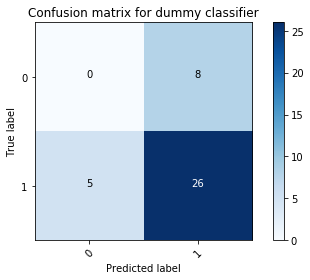

In [77]:
classes = np.unique(y_test)
cm = confusion_matrix(y_test, preds,classes)
fig = plt.figure()
title='Confusion matrix for dummy classifier'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
preds = knn.predict(X_test)

print (classification_report(y_test, preds))

f1_micro.append(f1_score(y_test, preds, average='micro'))
f1_macro.append(f1_score(y_test, preds, average='macro'))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.84      0.87      0.86        31

   micro avg       0.77      0.77      0.77        39
   macro avg       0.64      0.62      0.63        39
weighted avg       0.76      0.77      0.76        39



Confusion matrix, without normalization
[[ 3  5]
 [ 4 27]]


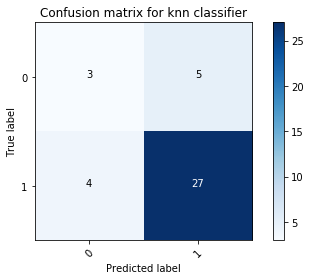

In [79]:
classes = np.unique(y_test)
cm = confusion_matrix(y_test, preds,classes)
fig = plt.figure()
title='Confusion matrix for knn classifier'
plot_confusion_matrix(cm,classes,title,normalize=False,cmap=plt.cm.Blues)

In [84]:
def create_bar_plot(values, ylabel_txt):

    N = len(values)
    ind = np.arange(N) # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, values, width)

    plt.ylabel(ylabel_txt)
    plt.title('F1 Scores')
    plt.xticks(ind, ('Dummy', 'KNN'))
    plt.yticks(np.arange(0, 1, 1))

    plt.show()


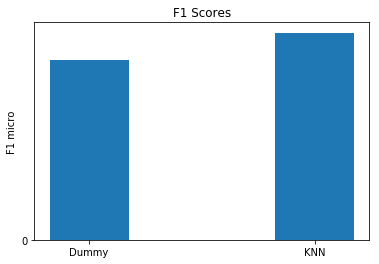

In [85]:
create_bar_plot(f1_micro, 'F1 micro')

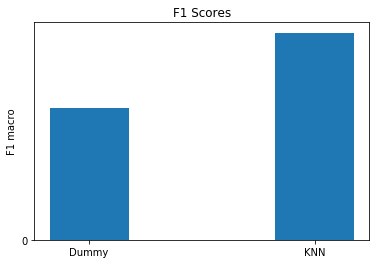

In [86]:
create_bar_plot(f1_macro, 'F1 macro')

As we see, the baseline dummy classifier does not manage to have a true positive on the 0 class.
That is why F1 macro is quite low in this case. 

For KNN, we see that it did manage to guess around half the 0 class and reaches a weighted average of 76%, while dummy raches only 64%.

# Part D: Optimization of the Classifiers

We will normalize the features and then use imbalance learn and PCA to have smaller dimentions.

In [95]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 1.5MB/s ta 0:00:01


In [175]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

class custom_pipe:
    
    
    def __init__(self, scaler, sampler):
    
        self.scaler = scaler
        self.sampler = sampler
        
    def change_pca(self, n_components):
        self.n_components = n_components
        
    def change_clf(self, clf):
        self.clf = clf

    def score(self, X_train, y_train, X_test, y_test):
        #scaling
        X_train_scaled = preprocessing.scale(X_train)
        self.scaler = self.scaler.fit(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        #resampling
        X_train_resampled, y_train_resampled = self.sampler.fit_sample(X_train_scaled, y_train)

        #pca
        pca = PCA(n_components=self.n_components)

        X_trainPCA = pca.fit_transform(X_train_resampled)
        X_testPCA = pca.transform(X_test_scaled)

        #classifier
        scores = cross_val_score(self.clf, X_trainPCA, y_train_resampled, cv=10, scoring='accuracy')
        return scores

In [206]:
def custom_gridsearch(pipe, clf_name, clf, param_1, param_2, pca_param, X_train, y_train, X_test, y_test):
    
    best_score = 0
    best_pca = 0
    best_param1 = ''
    best_param2 = 0
    
    if clf_name is'dummy':
        params = {
            'strategy': 'name',
            'constant': 0
        }
    else:
        params = {
            'n_neighbors' : 1
        }
    
    for comp in pca_param:
        for par1 in param_1:
            
            if clf_name is 'dummy':
                params['strategy'] = par1
            else:
                params['n_neighbors'] = par1
                
            if par1 is 'constant':
                
                for par2 in param_2:
                    params['constant'] = par2
                
            clf.set_params(**params)

            pipe.change_pca(comp)
            pipe.change_clf(clf)
            scores = pipe.score(X_train, y_train, X_test, y_test)
            score = scores.mean()
            if score > best_score:
                best_score = score
                best_pca = comp
                best_param1 = par1
                if par1  is 'constant':
                    best_param2 = par2
                else:
                    best_param2 = None
    return best_score, best_pca, best_param1, best_param2

In [207]:
# Optimize dummy classifier
dummy_param = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
dummy_constant = [0, 1]
pca_param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [208]:
scaler = preprocessing.StandardScaler()
ros = RandomOverSampler()
clf = DummyClassifier()

pipe = custom_pipe(scaler, ros)
res = custom_gridsearch(pipe, 'dummy', clf, dummy_param, dummy_constant, pca_param, X_train, y_train, X_test, y_test)

/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataCon

In [209]:
print(res)

(0.5803030303030303, 1, 'uniform', None)


In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn_param = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

scaler = preprocessing.StandardScaler()
ros = RandomOverSampler()
clf = KNeighborsClassifier()

pipe = custom_pipe(scaler, ros)
res = custom_gridsearch(pipe, 'knn', clf, knn_param, None, pca_param, X_train, y_train, X_test, y_test)

/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/debian/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataCon

In [211]:
print(res)

(0.9825757575757577, 10, 1, None)


## Best fits
We see that the best fits for our KNN classifier are PCA to 10 dimensions and then KNN with 1 neighbour with success rate 98,2%.
